<a href="https://colab.research.google.com/github/sudeep-009/CricketScoreCard-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Introduction**
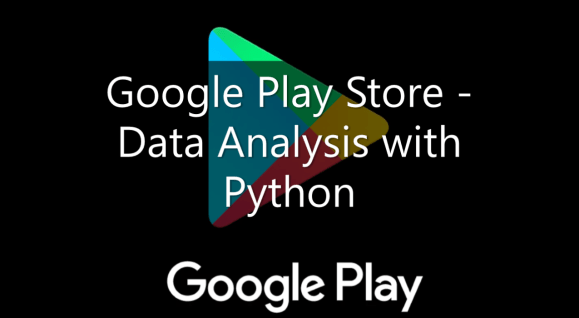






There is famous phrase which tell us that ***Data is the new oil of 21st century.***Business growth involves garnering as many customers as you can. This requires knowing exactly what customers desire and what channels they use to find products and services.In today cut-throat competation taking business decision based on gut-feel could have negative impact. Therefore utilizing the potential of value store beneath the mountain of data would be very effective.     
     In the PlayStore App data analysis we generally tried to find some of the actionalble insight that would help our app developers to develop an app that would have huge customer base based on their previous experience. Digging out the value from data which would help the app making business to grow at huge volume is the main objective of this data analysis
   

#**Exploratory Data Analysis**
Before starting we should first understand what actually Exploratory Data Analysis is ?
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.
As we have understand what EDA actually is lets start our fun journey of playing around with the dataset.

#**Lets Start Our Journey!!!**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.style.use('ggplot') #to have ggplot like style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First we will import our datasets and convert it into pandas DataFrame.We have been given two datasets one for the PlayStore App and another for the user review. Lets go through it one by one. First we will explore the app dataset and then we will go through the userview dataset.

In [ ]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/EDA-Capstone-Play Store App Review'
app_df = pd.read_csv(working_directory+'/Play Store Data.csv')
user_review_df = pd.read_csv(working_directory+'/User Reviews.csv')

##**First we will go through our App Dataset**

Let see the first five record of our dataset so as to have some basic idea of what actually we have.

In [ ]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Let See how many records we have in our app dataset and the number of features for each record**

In [ ]:
print(f'No. of records present in our dataset: {app_df.shape[0]}')
print(f'No. of features each record have is: {app_df.shape[1]}')

No. of records present in our dataset: 10841
No. of features each record have is: 13


**Lets go through the each of the features present in our app dataset**

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Features present in our App dataset are as follows:

*   **App**: Name of the App.
*   **App Category**: Category of the app. Like Games, Fitness etc

*   **Rating**: Rating of the app out of in scale of 1 to 5.

*   **Reviews**: Number of reviews each app received.

*   **Size**: The memory size needed to install the application.

*   **Installs**: No. of install of particular app

*   **Type**: Whether the app is free or a paid app.

*   **Price**: The price of the app.

*   **Content Rating**: This feature tell us about the intended audience for the app like teens, everyone etc
.

*   **Genres**: The sub-category for each app. 

*   **Last Updated**: date of the most recent update for the app.

*   **Current Ver**: The app's current version.

*   **Android Ver**: The oldest version of Android OS supported by the app.




In [ ]:
def PS_info():
  info = pd.DataFrame(index=app_df.columns)
  info['dtype'] = app_df.dtypes
  info['Unique'] = app_df.nunique()
  info['Num_ofNullValues'] = app_df.isnull().sum()
  info['Num_nonNullValues'] = app_df.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(app_df) * 100
  return info

PS_info()

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,9660,0,10841,0.000000
Category,object,34,0,10841,0.000000
Rating,float64,40,1474,9367,13.596532
Reviews,object,6002,0,10841,0.000000
Size,object,462,0,10841,0.000000
Installs,object,22,0,10841,0.000000
Type,object,3,1,10840,0.009224
Price,object,93,0,10841,0.000000
Content Rating,object,6,1,10840,0.009224
Genres,object,120,0,10841,0.000000


# **Lets go through the User Review dataset!!!**

In [ ]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**Let see how many records are present in our dataset and also the number of features each record have**

In [ ]:
print(f'No of Records present in user review dataset are {user_review_df.shape[0]}')
print(f'No of features each record have is {user_review_df.shape[1]}')

No of Records present in user review dataset are 64295
No of features each record have is 5


**Lets go through each of the features and see what it tell us**

In [ ]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


So Basically we have five features in this dataset which are as follows:




*   App - It tells us about the name of the application.
*   Translated_Review - It tells us about what the users feedback is about the application.
*   Sentiment - It tells us about a view or opinion of the user w.r.t. the application.
*   Sentiment_Polarity - Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the application.
*   Sentiment_Subjectivity - It refers to the text that contains text which is usually expressed by a human having typical moods, emotions, and feelings. Mostly it is a public opinion and not a factual information.





In [ ]:
def UR_info():
  info = pd.DataFrame(index=user_review_df.columns)
  info['dtype'] = user_review_df.dtypes
  info['Unique'] = user_review_df.nunique()
  info['Num_ofNullValues'] = user_review_df.isnull().sum()
  info['Num_nonNullValues'] = user_review_df.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(user_review_df) * 100
  return info
UR_info()

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,1074,0,64295,0.000000
Translated_Review,object,27994,26868,37427,41.788631
Sentiment,object,3,26863,37432,41.780854
Sentiment_Polarity,float64,6195,26863,37432,41.780854
Sentiment_Subjectivity,float64,4530,26863,37432,41.780854


#### **Now its time to start doing some cleaning operation**
We will start with handling the **missing values** present in our app dataset

In [ ]:
app_df_na = app_df.isnull().sum()/len(app_df)*100
app_df_na = app_df_na.drop(app_df_na[app_df_na == 0].index,axis=0).reset_index()
app_df_na.columns = ['Feature Name','Missing Ratio']
app_df_na

,Feature Name,Missing Ratio
0,Rating,13.596532
1,Type,0.009224
2,Content Rating,0.009224
3,Current Ver,0.073794
4,Android Ver,0.027673


I will **drop all the null values present the Rating column** because filling almost 14% of data with some alternative value could lead us to a wrong analysis and i think rating is very important feature present in this dataset so i will not going to manipulate it.

In [ ]:
app_df.dropna(subset=['Rating'],inplace=True)

In [ ]:
app_df_na = app_df.isnull().sum()/len(app_df)*100
app_df_na = app_df_na.drop(app_df_na[app_df_na == 0].index,axis=0).reset_index()
app_df_na.columns = ['Feature Name','Missing Ratio']
app_df_na

,Feature Name,Missing Ratio
0,Content Rating,0.010676
1,Current Ver,0.042703
2,Android Ver,0.032027


Ratio of Missing value for all other feature is almost negligible so just fill them with their mode

In [ ]:
app_df['Current Ver'] = app_df['Current Ver'].fillna(app_df['Current Ver'].mode())
app_df['Android Ver'] = app_df['Android Ver'].fillna(app_df['Android Ver'].mode())
app_df['Content Rating'] = app_df['Content Rating'].fillna(app_df['Content Rating'].mode())


**Duplicate Values**
Now Let See how many duplicate value are present are in the App Column and drop those records as these are added more than one time by mistake. Means its just like having two or more record for the same app. So lets just delete them


In [ ]:
duplicate_app = len(app_df)-len(pd.unique(app_df['App']))
print(f'Number of duplicate value present in the app column is {duplicate_app}')

Number of duplicate value present in the app column is 1170


In [ ]:
app_df = app_df.drop_duplicates(subset=['App'])

Now let see how many records are present in the dataset after removing the duplicates and dropping the null values


In [ ]:
print(f'No. of records present in our dataset is: {app_df.shape[0]}')

No. of records present in our dataset is: 8197


In [ ]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
PS_info()

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,8197,0,8197,0.000000
Category,object,34,0,8197,0.000000
Rating,float64,40,0,8197,0.000000
Reviews,object,5322,0,8197,0.000000
Size,object,415,0,8197,0.000000
Installs,object,20,0,8197,0.000000
Type,object,3,0,8197,0.000000
Price,object,74,0,8197,0.000000
Content Rating,object,6,1,8196,0.012200
Genres,object,115,0,8197,0.000000


####**Lets check the sanity of Rating Column**
As dtype of Rating is int type we can perform some sort of visulization to see if there is any noticable outlier present

In [ ]:
%matplotlib inline
import plotly.express as px
fig = px.box(app_df,y='Rating',points="all",width=500,height=500,notched=True)
fig.update_layout(
    paper_bgcolor="White"
)
fig.show(renderer="colab")

So there is one outlier present with value 19. Lets remove this outlier

In [ ]:
app_df.drop(index=app_df[app_df['Rating']==app_df['Rating'].max()].index,axis=0,inplace=True)
app_df.shape

(8196, 13)

So currently we have **Reviews,Price,Install and Size as object** lets do some cleaning in these columns and **convert it into integer type**.

In [ ]:
app_df['Reviews'] = app_df['Reviews'].apply(lambda x: int(x))

In [ ]:
#Change type of Installs as int type
app_df.groupby('Installs').agg({"App": "count"}).head(3)

,App
Installs,
1+,3
"1,000+",697
"1,000,000+",1415


In [ ]:
#So first we have to replace the + and , sign from the column and then convert it into int
app_df['Installs'] = app_df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
app_df['Installs'] = app_df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
app_df['Installs'] = app_df['Installs'].apply(lambda x: int(x))
app_df['Installs'].describe()



count    8.196000e+03
mean     9.165090e+06
std      5.825087e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
#Change type of Reviews as int type
app_df[app_df['Price'] != '0'].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up


So first we have to remove the $ sign present in the price column. May be regex would be helpful

In [ ]:
app_df['Price'] = app_df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
app_df['Price'] = app_df['Price'].apply(lambda x: float(x))
app_df['Price'].describe()


count    8196.000000
mean        1.037884
std        16.857882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

**Findings:**


1.   Maximum Price of an App is 400$



####Now Lets clean the Size feature of an app by first removing the characters and then bringing consistency in units by converting kilobyte into Megabyte and then finally converting into float type.

In [ ]:
app_df['Size'] = app_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: str(x).replace(',','') if 'M' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)
# app_df['Size'] = app_df['Size'].apply(lambda x: str(x).replace('k','') if 'k' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: float(x))
app_df['Size'].describe()

count    7027.000000
mean       21.754427
std        22.726503
min         0.008500
25%         4.900000
50%        13.000000
75%        31.000000
max       100.000000
Name: Size, dtype: float64

**Findings:**
50 percent of Apps have size less 13 Mb. 
75 percent of Apps have size less than 31 Mb. So we can say that most of the Apps are generally light weighted.

###**Its time for cleaning user review dataset!!!**

In [ ]:
UR_info()

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,1074,0,64295,0.000000
Translated_Review,object,27994,26868,37427,41.788631
Sentiment,object,3,26863,37432,41.780854
Sentiment_Polarity,float64,6195,26863,37432,41.780854
Sentiment_Subjectivity,float64,4530,26863,37432,41.780854


As there are lots of null values present in this datasets...so its may be because those apps have not received any user review.Let make a copy of this dataset and drop the null values.


In [ ]:
new_ur_df = user_review_df.copy()
new_ur_df.dropna(inplace=True)
new_ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            7027 non-null   float64
 5   Installs        8196 non-null   int64  
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   float64
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 896.4+ KB


###**Data Exploration!!!**
We will start with pairplot catering all the numerical feature space present in the dataset.

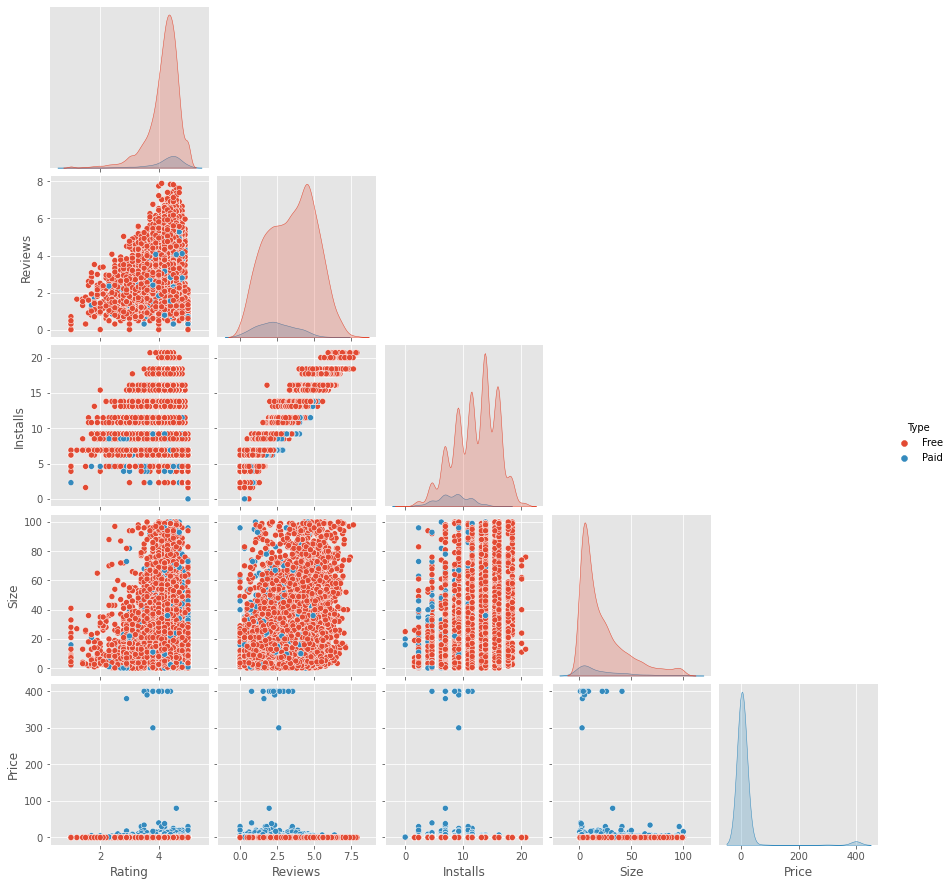

In [ ]:
Rating = app_df['Rating']
Reviews = np.log10(app_df['Reviews'])
Installs = np.log(app_df['Installs'])
Size = app_df['Size']
Price = app_df['Price']
Type = app_df['Type']
sns.pairplot(data=pd.DataFrame(zip(Rating,Reviews,Installs,Size,Price,Type),columns=['Rating','Reviews','Installs','Size','Price','Type']),hue='Type',corner=True)

**Findings**


*   Most of the App are Free

*   Most of the Paid Apps have Rating around 4

*   As the number of installation increases the number of reviews of the particaular app also increases.
*   Most of the Apps are light-weighted.



**Let us see how size of an app effect the Rating and Number of Installs**

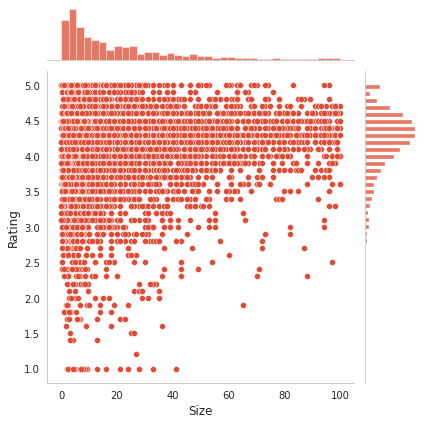

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.jointplot(x=app_df['Size'],y=app_df['Rating'])



**Which categories have bulkiest app and how they are rated**

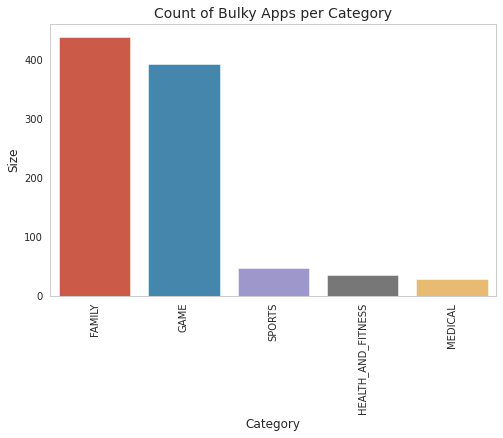

In [ ]:
# First we need to trim our dataset for apps having size > 40 MB
bulky_app_df = app_df[app_df['Size']>40]
bulky_app_categories_df = bulky_app_df.groupby('Category').agg({'Size':'count'}).reset_index().sort_values('Size',ascending=False).head()
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor('white')
plt.xticks(rotation="90")
plt.grid(False)
plt.title('Count of Bulky Apps per Category',size = 14)
sns.barplot(x=bulky_app_categories_df['Category'],y=bulky_app_categories_df['Size'])

**Bulky Apps mostly belongs to either of the two category:**

1.   Family
2.   Game



**Next Let us see that how these bulky apps have been rated**

Text(0.5, 0, 'Rating')

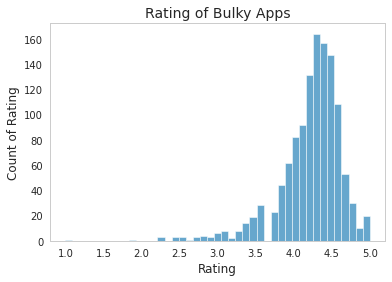

In [ ]:
sns.histplot(data=bulky_app_df,x='Rating')
plt.title('Rating of Bulky Apps',size = 14)
plt.ylabel('Count of Rating', size=12)
plt.xlabel('Rating',size=12)


**Finding:** Despite being bulky these apps are quite popular among the users.

Now let us see that how the bulky apps are performing in paid app category.

Text(0.5, 0, 'Size of App')

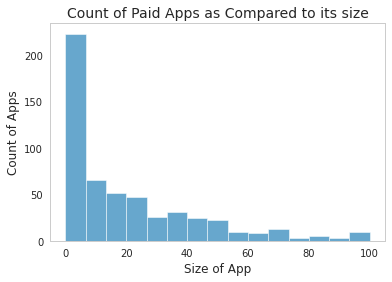

In [ ]:
paid_apps = app_df[app_df.Type == 'Paid']
sns.histplot(x=paid_apps['Size'])
plt.title('Count of Paid Apps as Compared to its size',size=14)
plt.ylabel('Count of Apps')
plt.xlabel('Size of App')

**Finding:**Most of the paid app apps are purposely made lighter by weight so as to garner specific user community. User prefer to buy apps that are lighter by weight. Developing bulky paid app probably will not perform well in the market.